In [635]:
import pandas as pd
import numpy as np
from single import *
from cross import *
import matplotlib.pyplot as plt

In [449]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train = train.drop(20926)
train = train.drop(20231)
train = train.drop(20427)
train = train.drop(5775)

In [606]:
train.head(1)

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間


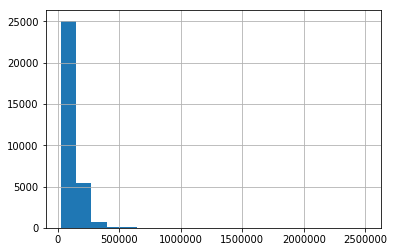

In [608]:
train["賃料"].hist(bins=20)

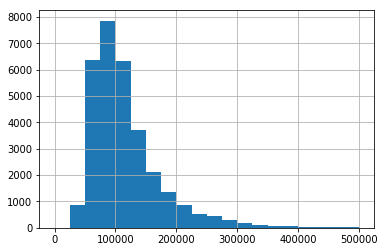

In [610]:
train["賃料"].hist(bins=20,range=(0,500000))

226000.0


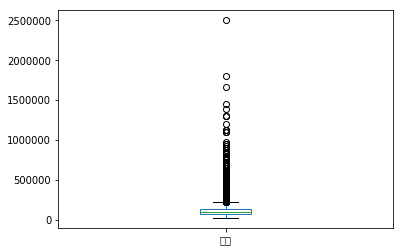

In [619]:
train["賃料"].plot.box()
Q1 = train["賃料"].quantile(0.25)
Q3 = train["賃料"].quantile(0.75)
whisker = Q3+(Q3-Q1)*1.5
print(whisker)

# 賃料について
ざっくりヒストグラムを書くと、年収などと等しくかなり右に裾野の広い分布になってます。  
パラメトリックなモデルではlog変換とかかけたほうがいいかもしれません。  
Boxプロットもシてみますが、Boxプロットだと外れ値の要素がかなり多くなっていることがわかります。  
whiskerは22万6000円で、たしかにこのあたりの家賃は外れ値と言えるかもしれません  
(ざっくりググった結果では1000万くらい年収が無いと維持できないくらいの価格です)

In [621]:
hoge = parse_area_size()
hoge = hoge.transform(train)

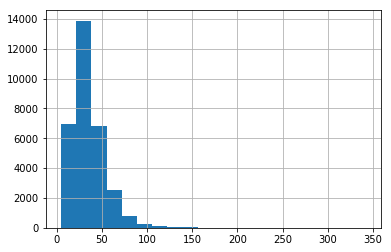

In [625]:
hoge["mf_areasize"].hist(bins=20)

72.315


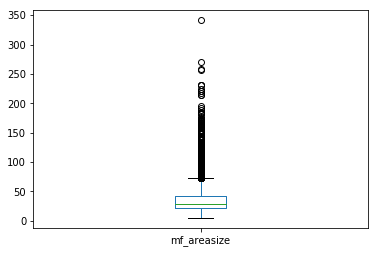

In [628]:
hoge["mf_areasize"].plot.box()
Q1 = hoge["mf_areasize"].quantile(0.25)
Q3 = hoge["mf_areasize"].quantile(0.75)
whisker = Q3+(Q3-Q1)*1.5
print(whisker)

# 面積について
面積についてもざっくりとhistを書いてboxプロットをします。  
面積側も右に裾野の広い分布となっています。  
外れ値の基準はざっくり72m^2(40畳弱くらい?広めの3LDKとかでやっと届くくらいですかね)になっていました。  

,mf_areasize,賃料
mf_areasize,1.000000,0.758233
賃料,0.758233,1.000000


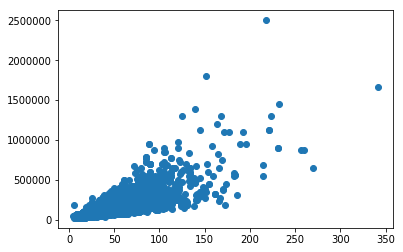

In [638]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(hoge["mf_areasize"],hoge["賃料"])
hoge[["mf_areasize","賃料"]].corr()

# 面積-賃料プロット
予想通り正の相関が出ていますね。
基本の土地代×広さ＋付加価値みたいな関係で家賃はざっくり決まってると思うので、当然といえば当然ですが。

6141
25091
234


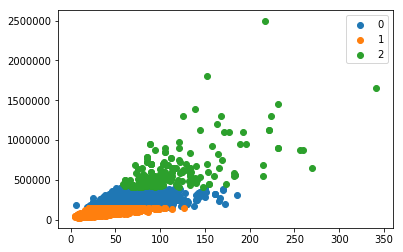

In [581]:
kmeans = KMeans(n_clusters=3)
data = hoge[["mf_areasize","賃料"]].values
kmeans.fit(data)
cs = [[] for i in range(max(kmeans.labels_) +1)]
for i in range(len(data)):
    cs[kmeans.labels_[i]].append(data[i])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ind = 0
for c in cs:
    print(len(c))
    ct = np.array(c).T
    ax.scatter(ct[0],ct[1],label=ind)
    ind += 1
    ax.legend()

In [542]:
train.query("賃料<=@th").describe()

,id,賃料
count,30840.000000,30840.000000
mean,15726.244293,111682.436543
std,9084.397972,49890.792874
min,1.000000,25000.000000
25%,7856.750000,75500.000000
50%,15716.500000,100500.000000
75%,23585.250000,134000.000000
max,31470.000000,300000.000000


In [599]:
pat = "駐車場\t.{,1}有"
for i in range(10,20):
    txt = train["駐車場"].values[i]
    if txt == txt:
        print(txt)
        print(re.match(pat,txt))

駐車場	空有	32,400円(税込)	駐輪場	空有	バイク置き場	空有
<re.Match object; span=(0, 6), match='駐車場\t空有'>
駐輪場	無	バイク置き場	無
None
駐輪場	空有	バイク置き場	無
None
駐車場	近隣	27,000円(税込)	距離500m	駐輪場	無	バイク置き場	無
None
駐輪場	空有	バイク置き場	空有	駐車場	近隣	23,000円	距離150m
None
駐車場	近隣	15,120円	距離200m
None
駐輪場	空有
None
駐車場	無	駐輪場	無	バイク置き場	無
None


In [653]:
train["室内設備"].str.contains("バルコニー").sum()

25136

In [530]:
hoge.groupby(["south","east"]).mean().index.values

array([(0.0, 0.0), (0.0, 0.5), (0.0, 1.0), (0.5, 0.0), (0.5, 0.5),
       (1.0, 0.0)], dtype=object)

In [640]:
hoge = extract_district()
hoge = hoge.transform(train)

In [646]:
temp = hoge.groupby("district")["id"].count()

In [650]:
temp["世田谷"]

AttributeError: 'numpy.int64' object has no attribute 'values'

In [662]:
class info_encoder:
    def __init__(self):
        self.tags = {'インターネット対応': 0, 'CATV': 1, 'CSアンテナ': 2, 'BSアンテナ': 3,
                     '光ファイバー': 4, '高速インターネット': 5, 'インターネット使用料無料': 6,"有線放送":7}
        self.rare = {}
    def fit(self,x,y):
        for key in self.tags.keys():
            temp = x["放送・通信"].str.contains(key).sum()
            self.rare[key] = temp
        return self
    def transform(self,x):
        temp = x["放送・通信"].values
        setubi = [[0 for i in range(len(self.tags))] for j in range(len(temp))]
        setubi2 = [[0 for i in range(len(self.tags))] for j in range(len(temp))]
        pat = re.compile(r"／")
        tot = len(temp)
        for i in range(len(temp)):
            if temp[i] != temp[i]:
                continue
            else:
                block = temp[i].split()
                for i in range(len(block)):
                    block[i] = pat.sub("",block[i])
                for key in self.tags.keys():
                    if key in block:
                        setubi[i][self.tags[key]] = self.rare[key]
                        setubi2[i][self.tags[key]] = 1
                    else:
                        setubi[i][self.tags[key]] = tot-self.rare[key]
                        setubi2[i][self.tags[key]] = 0
#                 block = temp[i].split()
#                 for b in block:
#                     if pat.sub("",b) in self.keys:
#                         setubi[i][self.keys[pat.sub("",b)]] = 1
        setubi = pd.DataFrame(setubi)
        c_num = len(setubi.columns)
        col = []
        for i in range(c_num):
            col.append("info_rare"+str(i))
        setubi.columns = col
        hoge = x.drop("放送・通信",axis = 1)
        setubi.index = hoge.index
        hoge =  pd.concat([hoge,setubi],axis = 1)
        
        setubi = pd.DataFrame(setubi2)
        c_num = len(setubi.columns)
        col = []
        for i in range(c_num):
            col.append("info_one"+str(i))
        setubi.columns = col
        setubi.index = hoge.index
        hoge =  pd.concat([hoge,setubi],axis = 1)
        
        return hoge
hoge = info_encoder()
hoge.fit(train,[])
hoge = hoge.transform(train)

In [663]:
hoge.head()

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,...,info_rare6,info_rare7,info_one0,info_one1,info_one2,info_one3,info_one4,info_one5,info_one6,info_one7
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,...,26063,31394,0,0,0,0,0,1,0,0
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,...,26063,31394,0,1,0,0,1,0,0,0
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,...,26063,31394,1,1,0,0,1,0,0,0
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,...,5403,31394,1,0,1,1,0,0,1,0
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,...,26063,31394,1,1,1,1,1,0,0,0
